# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/2). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
# %config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (8, 8)
# plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

### Plot data set

Text(0,0.5,'Feature 2')

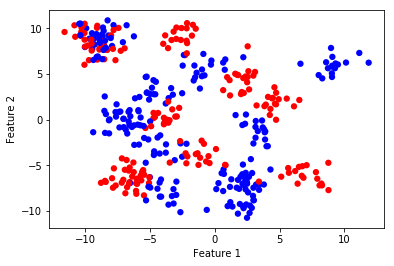

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### Data set split

As the data poins are uncorrelated all the ways of dividing the data set are equivalent. Here I decided to separate the training set and the testing set randomly, using 40% of the data for the test. 

In [4]:
# this function splits data randomly.
from sklearn import model_selection as ms

In [5]:
test_size = 0.40
X_fit, X_test, y_fit, y_test= ms.train_test_split(X, y, test_size=test_size, random_state=1, shuffle=True)

### Performance evaluation

To evaluate the performance we can use the simple accuracy, as in this case any of the classes is underrepresented. For this first test I will use 8 neighbours.

In [6]:
kneig = KNeighborsClassifier(n_neighbors=8)

clf = kneig.fit(X_fit,y_fit)

accuracy_fit = clf.score(X_fit, y_fit)
accuracy_test = clf.score(X_test, y_test)

In [7]:
print("Training score: {0} \nTest score: {1}".format(accuracy_fit, accuracy_test))

Training score: 0.9083333333333333 
Test score: 0.81875


### Best split

In [8]:
mean_fit_accuracies = []
var_fit_accuracies = []
mean_test_accuracies = []
var_test_accuracies = []

test_sizes = []
num_tests = 30

for i in range(1, 18):
    size = 0.05 * i 
    test_sizes.append(size)

    fit_accuracies = []
    test_accuracies = []
    
    for l in range(num_tests): 
        X_fit, X_test, y_fit, y_test= ms.train_test_split(
            X, y, test_size=size, shuffle=True)

        clf = kneig.fit(X_fit, y_fit)
    
        fit_accuracies.append(clf.score(X_fit, y_fit))
        test_accuracies.append(clf.score(X_test, y_test))

    mean_fit_accuracies.append(np.mean(fit_accuracies))
    var_fit_accuracies.append(np.var(fit_accuracies))
    mean_test_accuracies.append(np.mean(test_accuracies))
    var_test_accuracies.append(np.var(test_accuracies))

Text(0,0.5,'Accuracy')

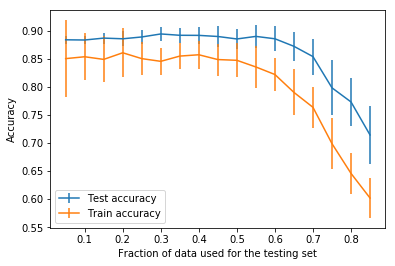

In [9]:
fig, ax = plt.subplots()
ax.errorbar(test_sizes, mean_fit_accuracies, np.sqrt(var_fit_accuracies), label='Test accuracy')
ax.errorbar(test_sizes, mean_test_accuracies, np.sqrt(var_test_accuracies), label = 'Train accuracy')
ax.legend()
ax.set_xlabel('Fraction of data used for the testing set')
ax.set_ylabel('Accuracy')

From the plot it is hard to say exactly which is the optimal division of the data. We can say however that the training set should contain (for K = 8) at least 50% of the data.

### Why are the performances different.

The model was fitted to the training data set, so it is expectable that the predictions of the training data set are better that the predictions in the test data set.


### Accuracy as a function of K and split fraction

This part may take 1 or 2 minutes. To make it faster the number of iterations num_iterations can be lowered.

In [10]:
test_sizes = np.linspace(0.1, 0.7, 7)
ks = np.arange(1,50)
num_iterations = 100

mean_fit_accuracies = np.zeros([len(ks), len(test_sizes)])
mean_test_accuracies = np.zeros([len(ks), len(test_sizes)])

for idx_s, size in enumerate(test_sizes):
    for idx_k, k in enumerate(ks):
        kneig = KNeighborsClassifier(n_neighbors=k)
        fit_accuracies = []
        test_accuracies = []

        for l in range(num_iterations): 
            X_fit, X_test, y_fit, y_test= ms.train_test_split(
                X, y, test_size=size, shuffle=True)

            clf = kneig.fit(X_fit, y_fit)

            fit_accuracies.append(clf.score(X_fit, y_fit))
            test_accuracies.append(clf.score(X_test, y_test))

        mean_fit_accuracies[idx_k, idx_s] = np.mean(fit_accuracies)
        mean_test_accuracies[idx_k, idx_s] = np.mean(test_accuracies)

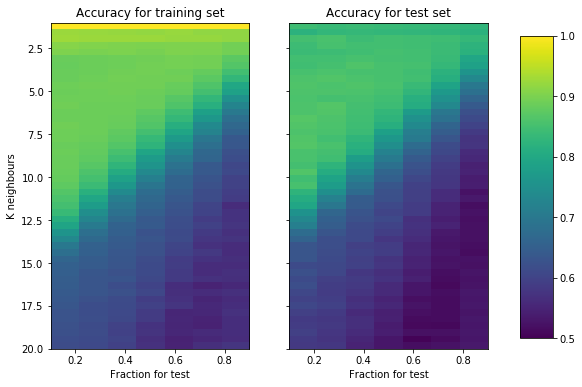

In [11]:
fig, axes = plt.subplots(figsize=(9,6), ncols=2, nrows=1, sharey=True)

cax1 = axes[0].imshow(mean_fit_accuracies, vmax=1, vmin=0.5, aspect='auto', extent=[0.1, 0.9, 20, 1])
cax2 = axes[1].imshow(mean_test_accuracies, vmax=1, vmin=0.5, aspect='auto',  extent=[0.1, 0.9, 20, 1])

axes[0].set_title('Accuracy for training set')
axes[1].set_title('Accuracy for test set')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

axes[0].set_ylabel('K neighbours')
axes[0].set_xlabel('Fraction for test')
axes[1].set_xlabel('Fraction for test')

fig.colorbar(cax1, cax=cbar_ax)

plt.show()

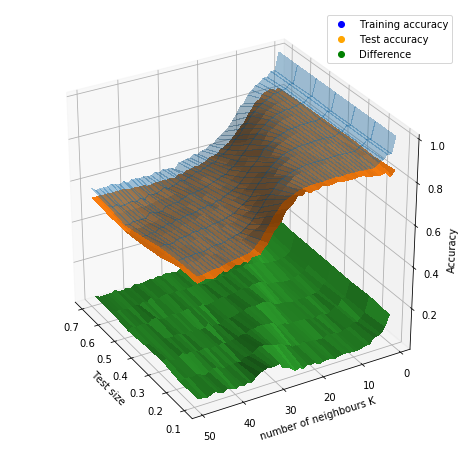

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import lines

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

xg, yg = np.meshgrid(test_sizes, ks)

surf = ax.plot_surface(xg, yg, mean_fit_accuracies, linewidth=0,
                       antialiased=False, alpha=0.4, label='Training accuracy')
surf = ax.plot_surface(xg, yg, mean_test_accuracies, linewidth=0,
                       antialiased=False, label='Test accuracy')
surf = ax.plot_surface(xg, yg, mean_fit_accuracies - mean_test_accuracies, linewidth=0,
                       antialiased=False, label='Difference')

ax.set_xlabel('Test size')
ax.set_ylabel('number of neighbours K')
ax.set_zlabel('Accuracy')

colors = ['blue', 'orange', 'green']

scatter1_proxy = lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'o')
scatter3_proxy = lines.Line2D([0],[0], linestyle="none", c=colors[2], marker = 'o')

ax.legend([scatter1_proxy, scatter2_proxy, scatter3_proxy],
          ['Training accuracy', 'Test accuracy', 'Difference'], numpoints = 1)
ax.view_init(30,150)
plt.show()

### Similarities and differences between the performance on the testing and training dataset

The accuracy behaviour is very similar for both the training data set and the test data set. As expected the accuracy for the test dataset is always lower than for the training data set.

#### Is a KNeighbor Classifier with 4 or 10 neighbors more complicated?


The less neighbours the more complex the model is. That is because the area classification gets more difficult to describe when decreasing K. It is more intuitive if one consider the extreme cases. For $K=N-1$ (N is the total number of points), the model will simply classify new points to be predicted giving them the label of the most common element in the training set; in the case we are working that would mean that all the area would be red or blue, depending on which is the most common in the training set. For $K=1$ on the other side we will get a map that will be much more difficult to describe. 

### Best setting of n_neighbors for this dataset

It is not very clear which is the best choice of K for this data set. From the surface plot we can see that all values of $K$ below 25 can achieve basically the same accuracy for the test data set. However if complexity increases with decreasing $K$ and we want the least complexity as possible, then the optimum $K$ would between 20 and 25.

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

In [14]:
rng = check_random_state(2)

In [15]:
X, y = make_regression(n_samples=300, noise_level=1)

### Plot data set

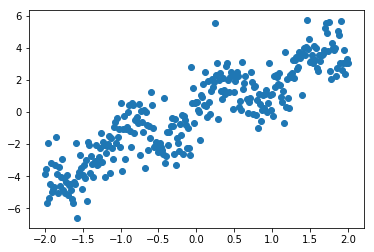

In [16]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.show()

### Regressors predictions to the location of the training and testing points

In [17]:
# We split the data
test_size = 0.40
X_fit, X_test, y_fit, y_test= ms.train_test_split(X, y, test_size=test_size, random_state=1, shuffle=True)

# The splittling was random, and for plotting is more convinient to have ordered data.
indices_to_sort = np.argsort(X_fit[:,0])
X_fit = X_fit[indices_to_sort]
y_fit = y_fit[indices_to_sort]

indices_to_sort = np.argsort(X_test[:,0])
X_test = X_test[indices_to_sort]
y_test = y_test[indices_to_sort]



In [18]:
ks = np.arange(1,50)

predictions_fit = []
predictions_test = []
mserrors_fit = []
mserrors_test = []

for k in ks:
    kneig = KNeighborsRegressor(n_neighbors=k)
    clf = kneig.fit(X_fit,y_fit)
    
    y_pred_test = clf.predict(X_test)
    y_pred_fit = clf.predict(X_fit)
    
    predictions_fit.append(y_pred_fit)
    predictions_test.append(y_pred_test)

    mserrors_fit.append(metrics.mean_squared_error(y_fit,y_pred_fit))
    mserrors_test.append(metrics.mean_squared_error(y_test,y_pred_test))

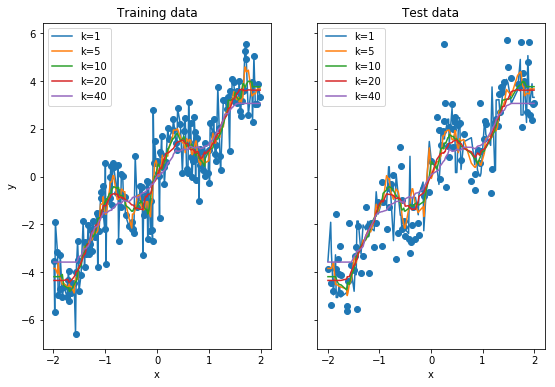

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(9,6), sharey=True)

fit_data = axes[0].scatter(X_fit, y_fit)
test_data = axes[1].scatter(X_test, y_test)


caxes_fit = []
caxes_test = []

for i, k in enumerate([1,5,10,20,40]):    
    caxes_fit.append(axes[0].plot(X_fit, predictions_fit[k-1], label='k={0}'.format(k)))
    caxes_test.append(axes[1].plot(X_test, predictions_test[k-1], label='k={0}'.format(k)))
    
axes[0].legend()
axes[1].legend()

axes[0].set_title('Training data')
axes[1].set_title('Test data')

axes[0].set_xlabel('x')
axes[1].set_xlabel('x')

axes[0].set_ylabel('y')

plt.show()

### Mean squared error v.s. K

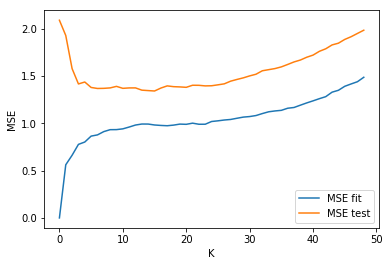

In [20]:
fig, ax = plt.subplots()
ax.plot(mserrors_fit, label='MSE fit')
ax.plot(mserrors_test, label='MSE test')
ax.set_xlabel('K')
ax.set_ylabel('MSE')
ax.legend()
plt.show()

### Similarities and differences between the performance on the testing and training dataset

Thse MSE in both cases behave similarly for $K > 10$, but they before that their bejhaviour is completly the opposite. 

### Best setting of n_neighbors for this dataset

The optimal value of K for this dataset would be between 10 and 20, as it minimizes the test MSE

### Mean square error plateau

The plateau of the MSE in the training dataset correspond to the variance of the normal distribution used for the noise.

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

In [21]:
from sklearn.linear_model import logistic
from utils import plot_surface


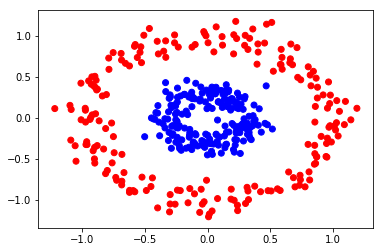

In [22]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [23]:
# We split the data
test_size = 0.4
X_fit, X_test, y_fit, y_test= ms.train_test_split(X, y, test_size=test_size, random_state=1, shuffle=True)

### Simple logistic regression

In [24]:
lreg = logistic.LogisticRegression()

In [25]:
clf = lreg.fit(X_fit, y_fit)

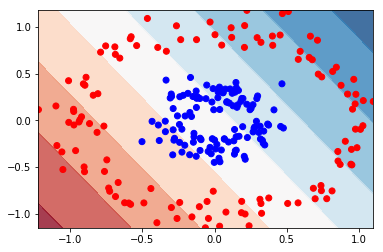

In [26]:
plot_surface(clf, X_fit, y_fit)

We can see that a simple logistic regression on the coordinates is not an adequate way to classify this data.

### Increasing complexity
Instead of using X to train the model, we can use a function of X. Using $X^2$ is a goo choice for this dataset, as the data set has a radial symmetry.

In [27]:
X2 = X ** 2

In [28]:
test_size = 0.5
X_fit, X_test, y_fit, y_test= ms.train_test_split(X2, y, test_size=test_size, random_state=1, shuffle=True)

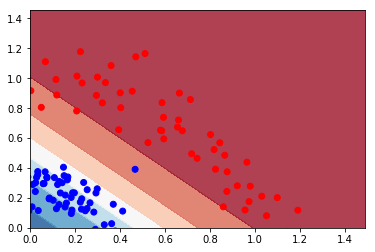

In [29]:
clf = lreg.fit(X_fit, y_fit)

n_steps = 1000

xlim = X2[:, 0].min(), X2[:, 0].max()
ylim = X2[:, 1].min(), X2[:, 1].max()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                     np.linspace(ylim[0], ylim[1], n_steps))

z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

z = z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

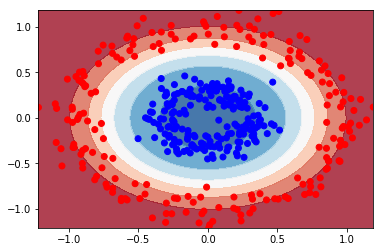

In [30]:
n_steps = 1000

xlim = X[:, 0].min(), X[:, 0].max()
ylim = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                     np.linspace(ylim[0], ylim[1], n_steps))

# if hasattr(clf, "decision_function"):
#     z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# else:
z = clf.predict_proba(np.c_[xx.ravel() ** 2, yy.ravel() ** 2])[:, 1]

z = z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()